In [ ]:
#feature scaling
'''
feature scaling=feature scaling is a technique to standardize the independent feature present in the data in a fixed range
'''
#standardization
'''
-also called as Z-score normalization
-mean=0,standard deviation=1
'''

'\n-also called as Z-score normalization\n-mean=0,standard deviation=1\n'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
39,27,31000,0
273,39,106000,1
94,29,83000,0
284,48,141000,0
162,37,33000,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


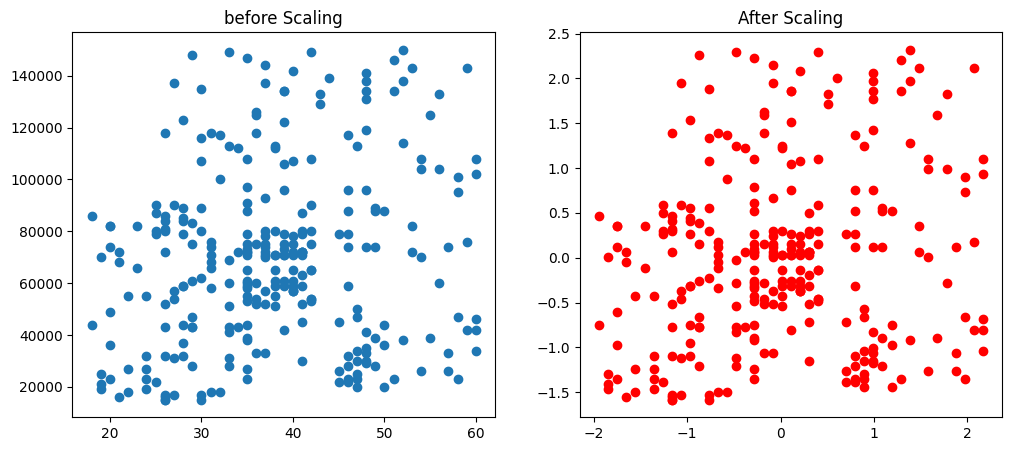

In [ ]:
#effect of scaling
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


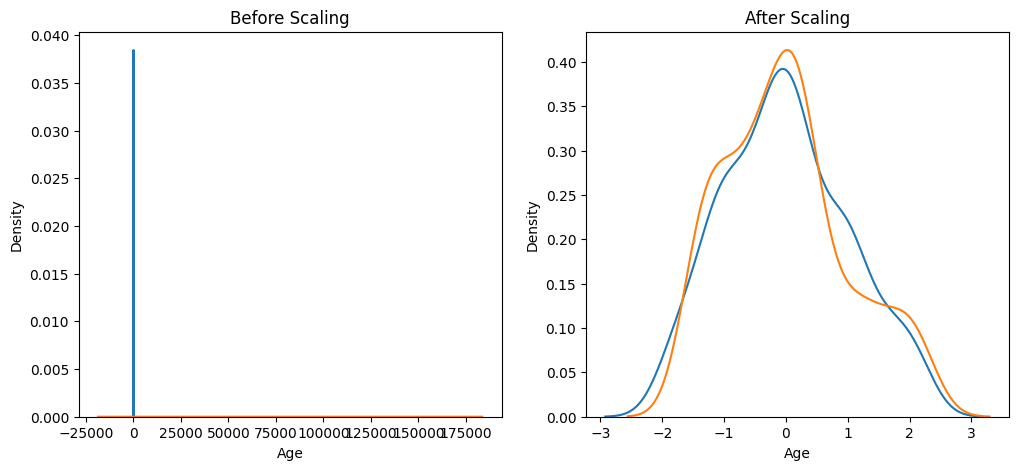

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2 , figsize=(12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

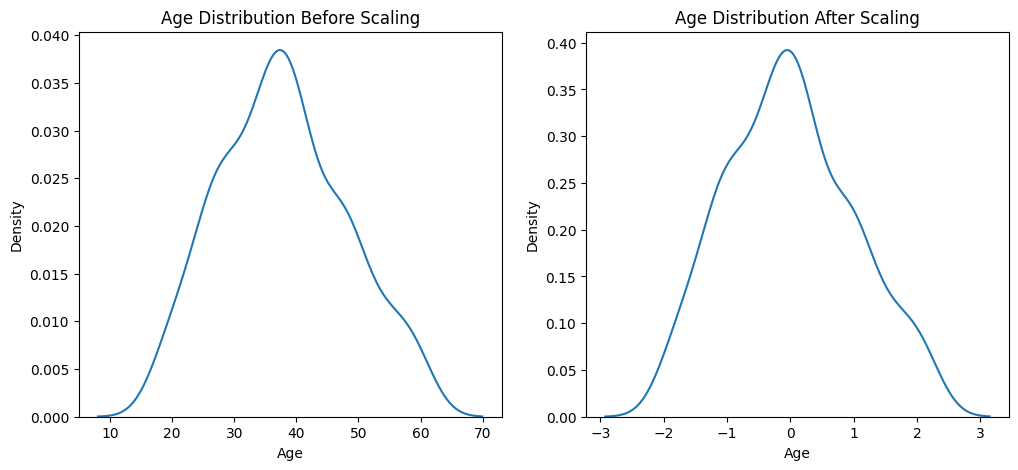

In [ ]:
#comparison of distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

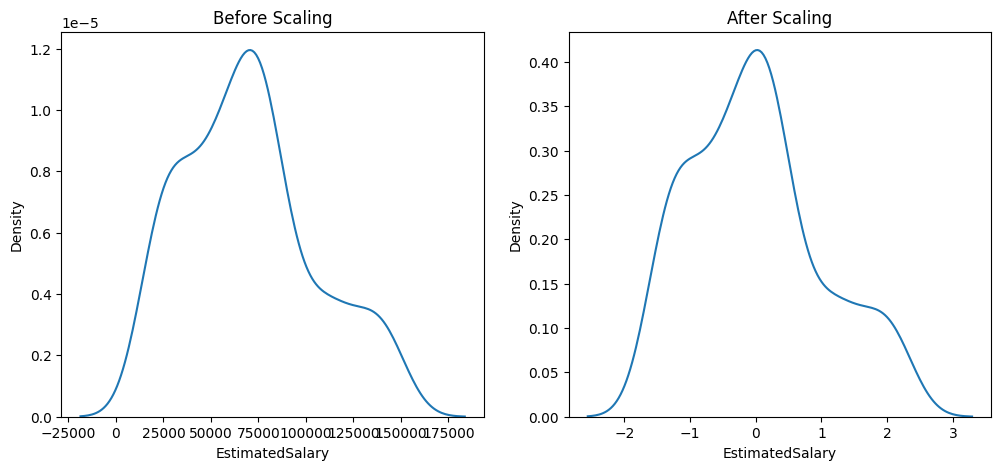

In [ ]:
#comparison of distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

why scaling is important

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))


Actual 0.6583333333333333
Scaled 0.8666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()


In [ ]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
#effect of outlier
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))
df

<ipython-input-34-fa5fbb28d701>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
1,90,250000,1
2,95,350000,1
0,5,1000,0
1,90,250000,1


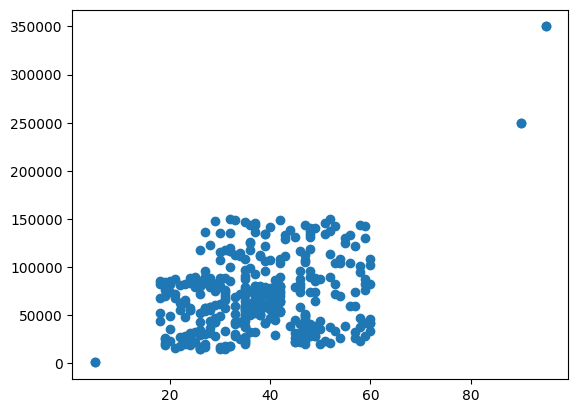

In [ ]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape, X_test.shape

((284, 2), (122, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

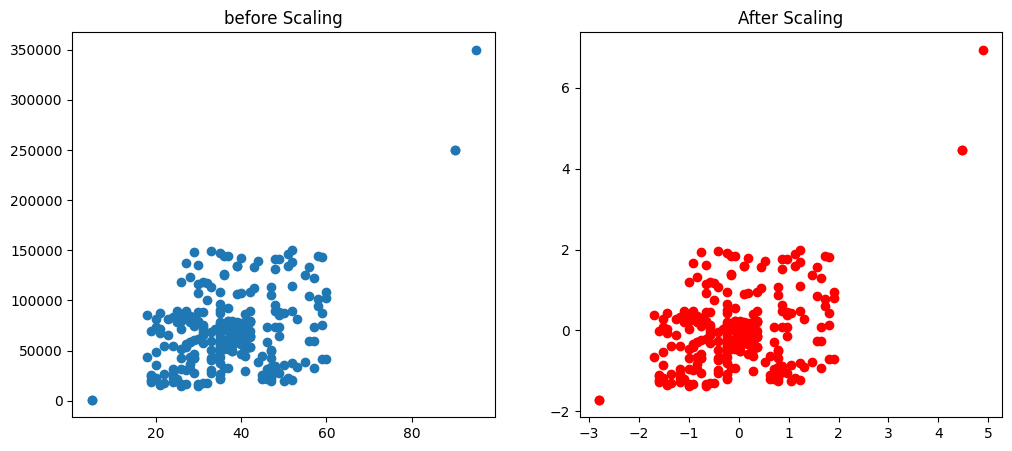

In [ ]:
#outliers re
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()